# University Quality Score Prediction

### Objective:
Build a regression model to predict overall_score using features such as research, teaching, citations, student/staff ratio, international outlook, and demographic factors. Identify which variables most strongly influence perceived university quality.

Target variable: Overall Score

In [262]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
sns.set_style("darkgrid")

In [263]:
df = pd.read_csv("World University Rankings.csv")
df = df.drop(columns=['closed', 'unaccredited'])
df['overall_score'] = pd.to_numeric(df['overall_score'], errors='coerce')
df['stats_number_students'] = df['stats_number_students'].str.replace(',', '')
df['stats_number_students'] = pd.to_numeric(df['stats_number_students'])
df['stats_pc_intl_students'] = df['stats_pc_intl_students'].str.replace('%', '')
df['stats_pc_intl_students'] = pd.to_numeric(df['stats_pc_intl_students'])
df['stats_pc_intl_students'] = df['stats_pc_intl_students']/100 

In [264]:
df.head()

,name,scores_teaching,scores_research,scores_citations,scores_industry_income,scores_international_outlook,record_type,member_level,location,stats_number_students,stats_student_staff_ratio,stats_pc_intl_students,stats_female_male_ratio,subjects_offered,overall_score
0,University of Oxford,96.6,100.0,99.0,98.7,97.5,master_account,0,United Kingdom,21750,10.9,0.42,49:51:00,"Geography,Chemistry,Chemical Engineering,Biolo...",98.5
1,Stanford University,99.0,97.8,99.6,100.0,87.0,private,0,United States,14517,6.4,0.23,47:53:00,"Computer Science,Communication & Media Studies...",98.0
2,Massachusetts Institute of Technology,98.6,96.2,99.7,100.0,93.8,private,0,United States,11085,8.0,0.33,41:59:00,"Architecture,Economics & Econometrics,Archaeol...",97.9
3,Harvard University,97.7,99.9,99.4,84.2,90.8,private,0,United States,20050,9.0,0.25,51:49:00,"Sociology,Architecture,Physics & Astronomy,Psy...",97.8
4,University of Cambridge,95.8,100.0,98.0,87.9,97.4,master_account,0,United Kingdom,20565,11.5,0.38,48:52:00,Politics & International Studies (incl Develop...,97.5


In [265]:
df.describe()

,scores_teaching,scores_research,scores_citations,scores_industry_income,scores_international_outlook,member_level,stats_number_students,stats_student_staff_ratio,stats_pc_intl_students,overall_score
count,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,2673.000000,2673.000000,2673.000000,2670.000000,201.000000
mean,29.060662,23.416176,52.189706,47.057405,49.907143,0.550318,18357.768051,19.130527,0.098019,70.358706
std,13.967201,16.697923,25.071342,26.150454,21.828249,2.231166,23325.307376,13.450010,0.134801,10.598516
min,9.400000,4.600000,3.400000,15.600000,16.100000,0.000000,25.000000,0.300000,0.000000,58.700000
25%,19.400000,11.800000,30.400000,22.275000,31.975000,0.000000,6175.000000,12.300000,0.010000,62.000000
50%,25.800000,17.250000,52.400000,41.050000,45.300000,0.000000,12771.000000,16.600000,0.050000,66.600000
75%,34.500000,29.900000,73.225000,68.200000,65.400000,0.000000,23951.000000,22.500000,0.130000,75.600000
max,99.000000,100.000000,99.700000,100.000000,98.800000,11.000000,482541.000000,333.300000,1.000000,98.500000


In [266]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2673 entries, 0 to 2672
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   name                          2673 non-null   object 
 1   scores_teaching               1904 non-null   float64
 2   scores_research               1904 non-null   float64
 3   scores_citations              1904 non-null   float64
 4   scores_industry_income        1904 non-null   float64
 5   scores_international_outlook  1904 non-null   float64
 6   record_type                   2673 non-null   object 
 7   member_level                  2673 non-null   int64  
 8   location                      2673 non-null   object 
 9   stats_number_students         2673 non-null   int64  
 10  stats_student_staff_ratio     2673 non-null   float64
 11  stats_pc_intl_students        2670 non-null   float64
 12  stats_female_male_ratio       2580 non-null   object 
 13  sub

In [267]:
# Get the rows where the overall score is present
overallScorePres = df[df['overall_score'].notnull()]
overallScorePres.shape

(201, 15)

In [268]:
overallScorePres.info()

<class 'pandas.core.frame.DataFrame'>
Index: 201 entries, 0 to 200
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   name                          201 non-null    object 
 1   scores_teaching               201 non-null    float64
 2   scores_research               201 non-null    float64
 3   scores_citations              201 non-null    float64
 4   scores_industry_income        201 non-null    float64
 5   scores_international_outlook  201 non-null    float64
 6   record_type                   201 non-null    object 
 7   member_level                  201 non-null    int64  
 8   location                      201 non-null    object 
 9   stats_number_students         201 non-null    int64  
 10  stats_student_staff_ratio     201 non-null    float64
 11  stats_pc_intl_students        201 non-null    float64
 12  stats_female_male_ratio       174 non-null    object 
 13  subjects_o

In [269]:
#split dataframe in to US and Rest of World
unitedSt_df = overallScorePres[overallScorePres['location'] == 'United States']
restOfW_df = overallScorePres[overallScorePres['location'] != 'United States']

#### Exploratory Data Analysis

In [270]:
df_numeric = overallScorePres[['scores_teaching', 'scores_research', 'scores_citations', 'scores_industry_income', 'scores_international_outlook', 
                 'stats_pc_intl_students', 'stats_student_staff_ratio', 'overall_score']]
df_cat = overallScorePres[['name', 'record_type', 'location', 'subjects_offered']]

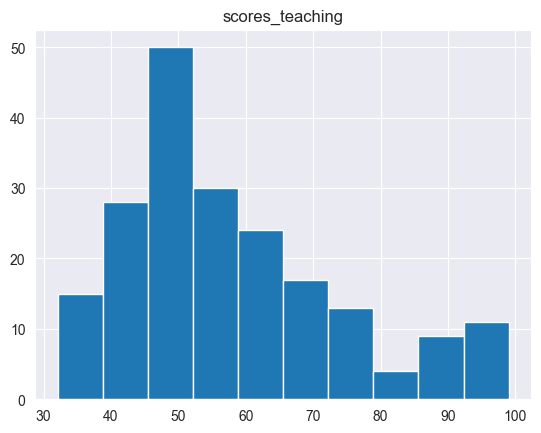

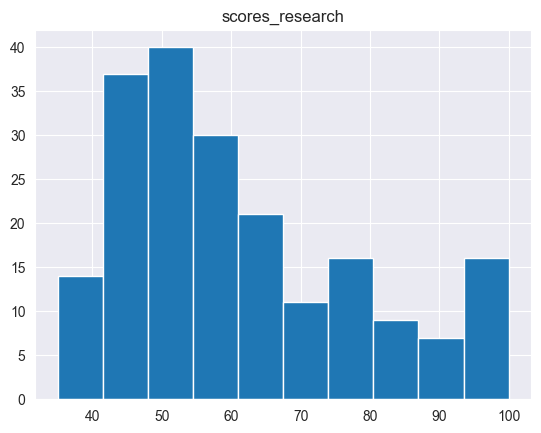

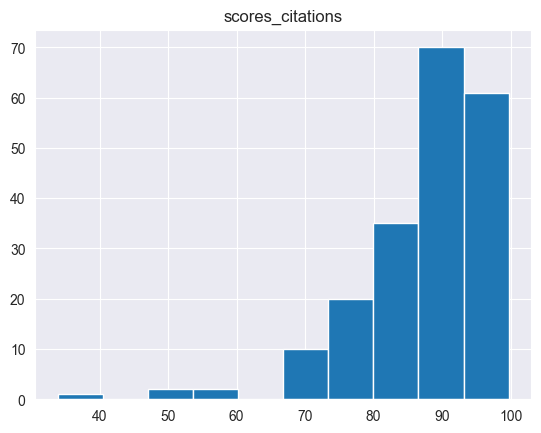

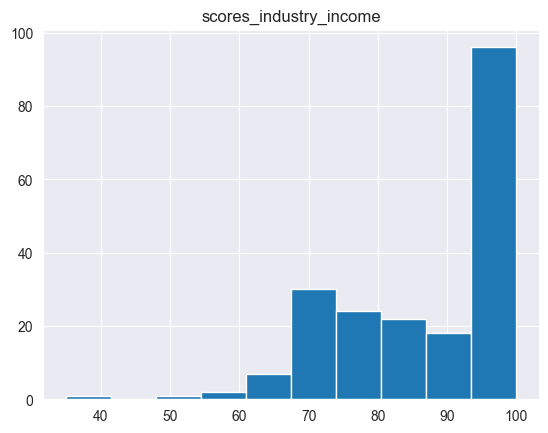

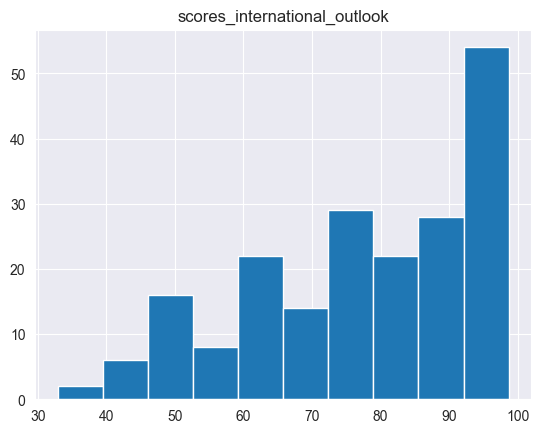

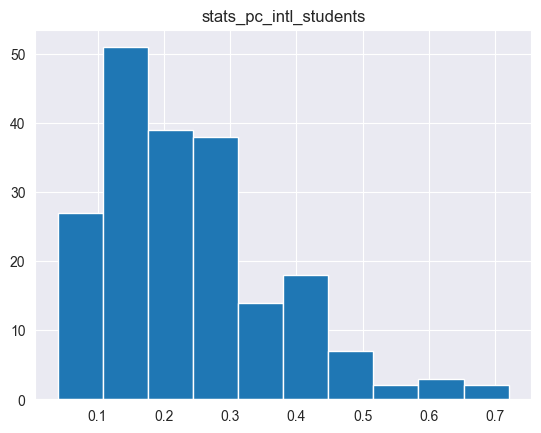

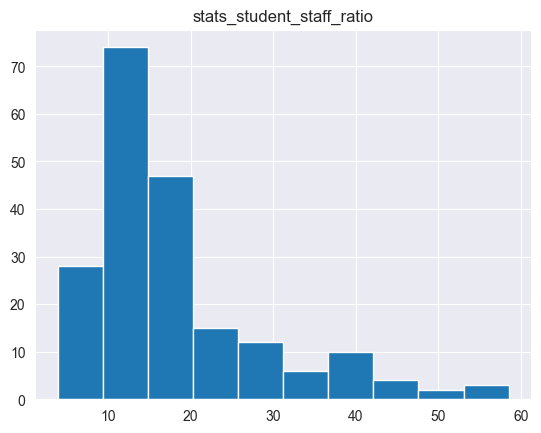

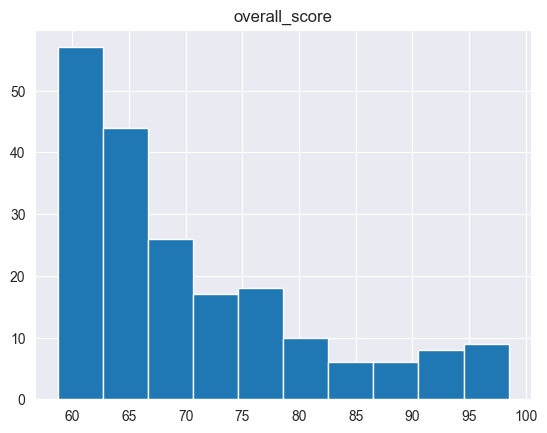

In [271]:
#distributions for numerics

for i in df_numeric.columns:
    plt.hist(df_numeric[i])
    plt.title(i)
    plt.show()

Text(0.5, 1.0, 'Correlations betwen Numerics')

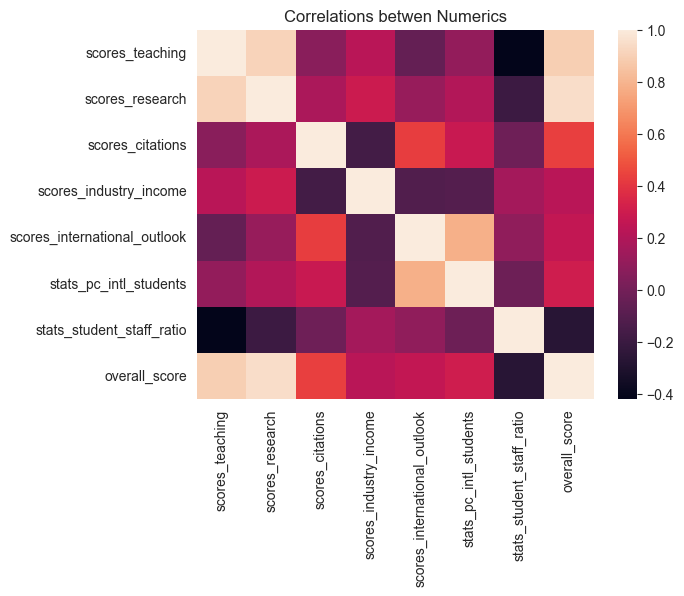

In [272]:
sns.heatmap(df_numeric.corr())
plt.title("Correlations betwen Numerics")

In [273]:
print("Research Score and Overall Score: " + str(overallScorePres['scores_research'].corr(overallScorePres['overall_score'])))
print("Teaching Score and Overall Score: " + str(overallScorePres['scores_teaching'].corr(overallScorePres['overall_score'])))
print("Citations and Overall Score: " + str(overallScorePres['scores_citations'].corr(overallScorePres['overall_score'])))
print("International Outlook and Overall Score: " + str(overallScorePres['scores_international_outlook'].corr(overallScorePres['overall_score'])))
print("Industry Income and Overall Score: " + str(overallScorePres['scores_industry_income'].corr(overallScorePres['overall_score'])))
print("Student/Staff ratio and Overall Score: " + str(overallScorePres['stats_student_staff_ratio'].corr(overallScorePres['overall_score'])))
print("Number of Students and Overall Score: " + str(overallScorePres['stats_number_students'].corr(overallScorePres['overall_score'])))

Research Score and Overall Score: 0.9484916872518373
Teaching Score and Overall Score: 0.8940093941899216
Citations and Overall Score: 0.4301882667464186
International Outlook and Overall Score: 0.257566653064757
Industry Income and Overall Score: 0.22825651275001219
Student/Staff ratio and Overall Score: -0.2669873343603253
Number of Students and Overall Score: 0.013257600438398687


The findings above show that Teaching Score and Research Score have a very high positive correlation with the Overall Score. Citations
have a moderate correlation with Overall Score and Internation outloook, student/staff ratio, and industry income have weak correlations. The number
of students has little to no correlation at all which means it will be removed from the training data.


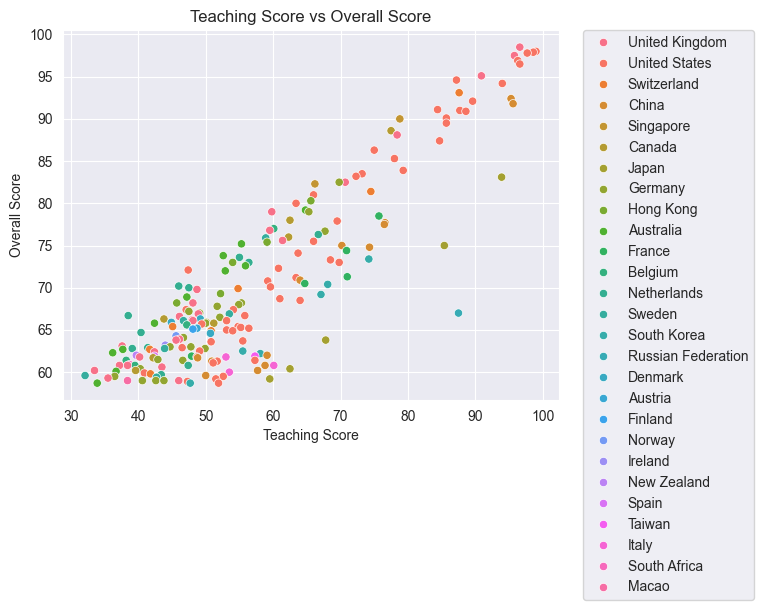

In [274]:
sns.scatterplot(x='scores_teaching', y='overall_score', data=overallScorePres, hue='location')
plt.title("Teaching Score vs Overall Score")
plt.xlabel("Teaching Score")
plt.ylabel("Overall Score")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

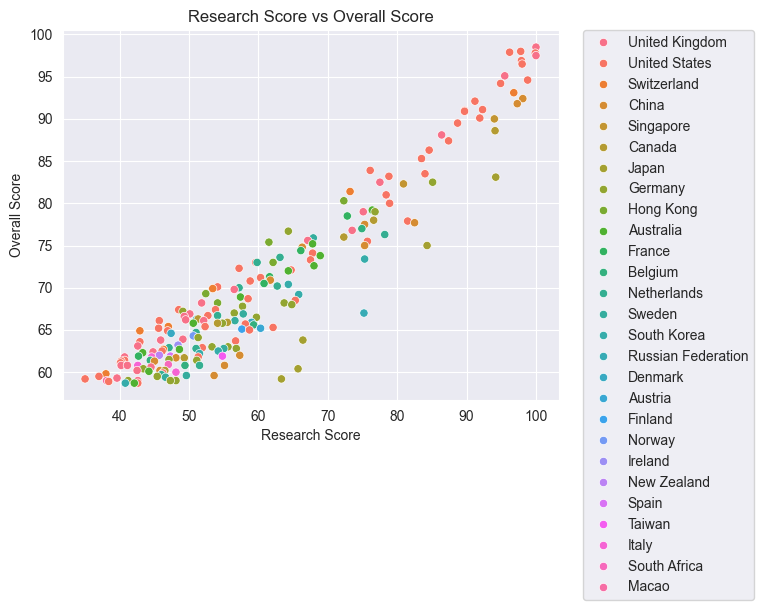

In [275]:
sns.scatterplot(x='scores_research', y='overall_score', data=overallScorePres, hue='location')
plt.title("Research Score vs Overall Score")
plt.xlabel("Research Score")
plt.ylabel("Overall Score")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

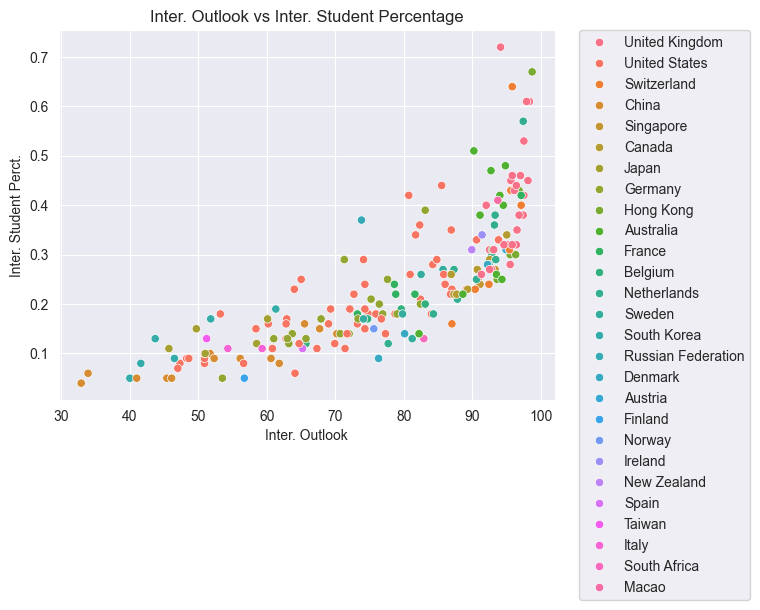

In [276]:
sns.scatterplot(x='scores_international_outlook', y='stats_pc_intl_students', data=overallScorePres, hue='location')
plt.title("Inter. Outlook vs Inter. Student Percentage")
plt.xlabel("Inter. Outlook")
plt.ylabel("Inter. Student Perct.")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

In [277]:
locations = overallScorePres['location'].unique()

#### Feature Engineering

In [278]:
overallScorePres = overallScorePres.drop(columns=['stats_number_students', 'scores_industry_income','record_type', 'stats_pc_intl_students'])
overallScorePres

,name,scores_teaching,scores_research,scores_citations,scores_international_outlook,member_level,location,stats_student_staff_ratio,stats_female_male_ratio,subjects_offered,overall_score
0,University of Oxford,96.6,100.0,99.0,97.5,0,United Kingdom,10.9,49:51:00,"Geography,Chemistry,Chemical Engineering,Biolo...",98.5
1,Stanford University,99.0,97.8,99.6,87.0,0,United States,6.4,47:53:00,"Computer Science,Communication & Media Studies...",98.0
2,Massachusetts Institute of Technology,98.6,96.2,99.7,93.8,0,United States,8.0,41:59:00,"Architecture,Economics & Econometrics,Archaeol...",97.9
3,Harvard University,97.7,99.9,99.4,90.8,0,United States,9.0,51:49:00,"Sociology,Architecture,Physics & Astronomy,Psy...",97.8
4,University of Cambridge,95.8,100.0,98.0,97.4,0,United Kingdom,11.5,48:52:00,Politics & International Studies (incl Develop...,97.5
...,...,...,...,...,...,...,...,...,...,...,...
196,Ulm University,40.6,41.2,87.9,63.0,0,Germany,26.4,51:49:00,"Other Health,Electrical & Electronic Engineeri...",59.0
197,Indiana University,47.3,38.4,84.9,64.7,0,United States,12.3,54:46:00,"Mechanical & Aerospace Engineering,Physics & A...",58.9
198,University of Notre Dame,51.9,42.6,76.1,69.9,0,United States,10.9,47:53:00,"Civil Engineering,Psychology,Biological Scienc...",58.7
199,Queensland University of Technology,33.9,42.1,89.5,82.2,6,Australia,37.9,54:46:00,"Other Health,Psychology,Art, Performing Arts &...",58.7


### Predicting Overall Scores Using Ridge Regression

In [279]:
features = ['scores_teaching', 'scores_research', 'scores_citations', 'scores_international_outlook', 'stats_student_staff_ratio']

X = overallScorePres[features] #features
y = overallScorePres['overall_score'] #target varible

#split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#train the ridge regression model
ridge = Ridge(alpha = 1.0)
ridge.fit(X_train_scaled, y_train)

#Predict
y_pred = ridge.predict(X_test_scaled)

# Evaluation
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R² Score: {r2:.3f}")
print(f"Mean Squared Error: {mse:.3f}")

# Optional: Display coefficients
coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': ridge.coef_
})
print(coef_df)


R² Score: 0.997
Mean Squared Error: 0.213
                        Feature  Coefficient
0               scores_teaching     4.781400
1               scores_research     5.343816
2              scores_citations     2.896431
3  scores_international_outlook     1.170321
4     stats_student_staff_ratio     0.080048


The Ridge Regression model achieved an R^2 score of 0.997, meaning that it explains 99.7% of the variance in overall university scores. MSE was low at 0.213 showcasing high predictive accuracy on the test data. 

Key findings from the model coefficients:

- Research Score and Teaching Score were the most influential features, with
  coefficients of 5.34 and 4.78 respectively.

- Citations had a moderate impact (2.90), while International Outlook had a smaller
  effect (1.17).

- Student/Staff Ratio had minimal influence (0.08), suggesting it plays a minor role in
  determining overall score.

#### Cross Validation

In [280]:
#Cross Validation for the Ridge Resgression

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

ridge = Ridge(alpha=1.0)

cv_scores = cross_val_score(ridge, X_scaled, y, cv=5, scoring='r2')

print("Cross-Validation R² Scores:", cv_scores)
print("Average CV R² Score:", np.mean(cv_scores))

Cross-Validation R² Scores: [0.99362577 0.96707204 0.75388922 0.83078647 0.50549731]
Average CV R² Score: 0.8101741634998417


The results of the cross validation show that the original R^2 score may have been too optimistic. On average the model explains 81% of the variance in overall scores, much lower than the original test where it was 99.7%. 

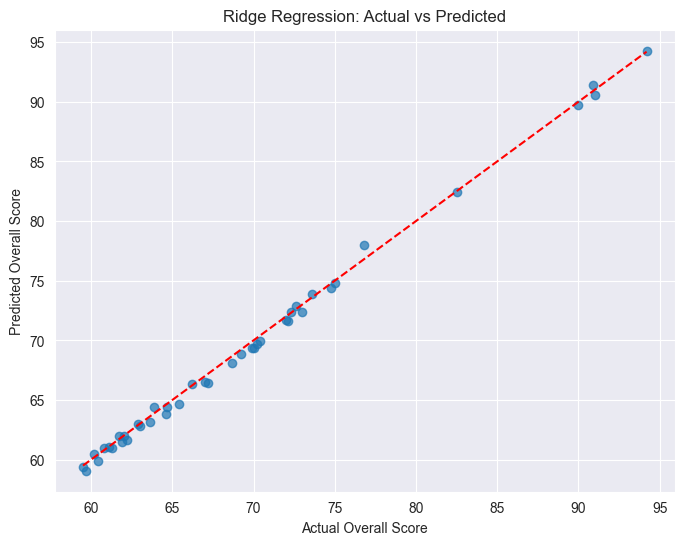

In [281]:
ridge.fit(X_train_scaled, y_train)
y_pred = ridge.predict(X_test_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Overall Score")
plt.ylabel("Predicted Overall Score")
plt.title("Ridge Regression: Actual vs Predicted")
plt.grid(True)
plt.show()